# Let's Clean Some Data

Fivethirtyeight has some great data sets and this is one of them. Some light cleaning should make it more usable!

In [1]:
# import libraries
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
# explore the data frame
display(star_wars.head(2))
display(star_wars.columns)
display(star_wars.shape)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

(1186, 38)

In [3]:
# rename columns


In [4]:
# value counts for columns 1:2
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [5]:
# switch values to boolean for columns 1:2
yes_no_bool = {"Yes":True, "No":False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no_bool)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no_bool)
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [6]:
# value counts for columns 3
print(star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


In [7]:
# switch values to boolean for columns 3:9
watch_bool = {"Star Wars: Episode I  The Phantom Menace" : True,
       "Star Wars: Episode II  Attack of the Clones" : True,
       "Star Wars: Episode III  Revenge of the Sith" : True,
       "Star Wars: Episode IV  A New Hope" : True,
       "Star Wars: Episode V The Empire Strikes Back" : True,
       "Star Wars: Episode VI Return of the Jedi" : True,
       np.NaN : False}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(watch_bool)

# value counts for columns 3
display(star_wars.iloc[:,3].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [8]:
# rename columns
star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply." : "seen_ep_1",
                                      "Unnamed: 4" : "seen_ep_2",
                                      "Unnamed: 5" : "seen_ep_3",
                                      "Unnamed: 6" : "seen_ep_4",
                                      "Unnamed: 7" : "seen_ep_5",
                                      "Unnamed: 8" : "seen_ep_6"})

display(star_wars.columns[3:9])

Index(['seen_ep_1', 'seen_ep_2', 'seen_ep_3', 'seen_ep_4', 'seen_ep_5',
       'seen_ep_6'],
      dtype='object')

In [9]:
# convert rankings to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# star_wars.columns[9].dtype # why does this work sometimes?
star_wars.iloc[:,9].dtype

dtype('float64')

In [10]:
# rename more columns
new_columns = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"rank_ep_1",
              "Unnamed: 10":"rank_ep_2",
              "Unnamed: 11":"rank_ep_3",
              "Unnamed: 12":"rank_ep_4",
              "Unnamed: 13":"rank_ep_5",
              "Unnamed: 14":"rank_ep_6",}
star_wars = star_wars.rename(columns = new_columns)

display(star_wars.columns[9:15])

Index(['rank_ep_1', 'rank_ep_2', 'rank_ep_3', 'rank_ep_4', 'rank_ep_5',
       'rank_ep_6'],
      dtype='object')

# Closer Look

In [11]:
# get average value for seen any, which episode, rankings by episode
means = star_wars.iloc[:,1:15].mean()
means = means.rename({"Do you consider yourself to be a fan of the Star Wars film franchise?":"Are you a fan of the Star Wars films?"})
display(means)

# totals
sums = star_wars.iloc[:,1:7].sum()
sums = sums.rename({"Do you consider yourself to be a fan of the Star Wars film franchise?":"Are you a fan of the Star Wars films?"})
display(sums)

Have you seen any of the 6 films in the Star Wars franchise?    0.789207
Are you a fan of the Star Wars films?                           0.660287
seen_ep_1                                                       0.567454
seen_ep_2                                                       0.481450
seen_ep_3                                                       0.463744
seen_ep_4                                                       0.511804
seen_ep_5                                                       0.639123
seen_ep_6                                                       0.622260
rank_ep_1                                                       3.732934
rank_ep_2                                                       4.087321
rank_ep_3                                                       4.341317
rank_ep_4                                                       3.272727
rank_ep_5                                                       2.513158
rank_ep_6                                          

Have you seen any of the 6 films in the Star Wars franchise?    936
Are you a fan of the Star Wars films?                           552
seen_ep_1                                                       673
seen_ep_2                                                       571
seen_ep_3                                                       550
seen_ep_4                                                       607
dtype: object

In [12]:
# math check :)
display(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))
# display(552/(552+284))
display(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))
display(552/(552+284))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

0.6602870813397129

In [13]:
# whats up with the fan nan's? 250 are people who haven't seen any, but what about the other 100
# amke a fan nan group

In [14]:
# reshape means with ep as index and seen and rank as columns then make side by side barh

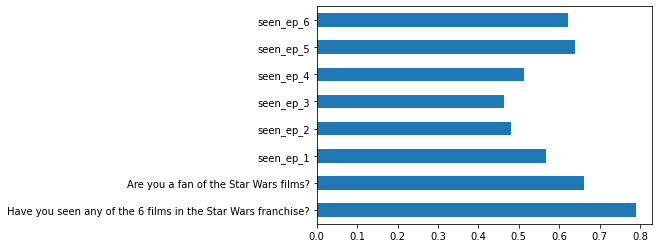

In [15]:
# bar chart for fan & episodes seen in % of total respondents
import matplotlib.pyplot as plt
%matplotlib inline
means[0:8].plot.barh()
plt.show()

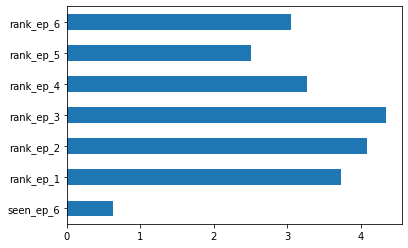

In [16]:
# bar chart for rankings
means[7:14].plot.barh()
plt.show()

# Impressions
* 

* Episode V is the favorite, but not by much.